In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X= data.data
y= data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [5]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
clf.C =1.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [9]:
clf.C =100.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9736842105263158

In [7]:
C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10]

In [8]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10** C_range_exp

In [9]:
C_range

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [12]:
from sklearn.model_selection import GridSearchCV
param ={'C': C_range} #clf.C
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lb

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=100, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1

In [11]:
clf.C = 100
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9736842105263158

In [13]:
gs.cv_results_

{'mean_fit_time': array([0.0009706 , 0.00073171, 0.00061623, 0.00060773, 0.00071057,
        0.0006694 , 0.00083502, 0.0006818 , 0.00061051, 0.00070548,
        0.00090154, 0.00072376, 0.00067973, 0.00063674, 0.00078257,
        0.00087174, 0.00108926, 0.00141676, 0.00193763, 0.00253359,
        0.00331052, 0.0062    , 0.00696985, 0.00850558, 0.00714842,
        0.00925525, 0.00903026, 0.00792249, 0.00775758, 0.00850956,
        0.00877094, 0.00812435, 0.0081389 , 0.00939727, 0.00767032,
        0.00800713]),
 'std_fit_time': array([3.77181558e-04, 9.34067480e-05, 1.92734384e-05, 1.58196911e-05,
        3.01479851e-05, 6.71345777e-06, 1.07565510e-04, 4.73176628e-05,
        1.94476437e-05, 1.11151652e-04, 7.38908716e-05, 1.20772811e-04,
        1.24450540e-05, 2.71994629e-05, 3.27217859e-05, 2.34284589e-05,
        2.17622173e-05, 1.69241742e-05, 1.44536335e-04, 3.06986509e-04,
        1.01076196e-03, 4.81980476e-03, 5.96611986e-03, 8.25415295e-03,
        6.10869417e-03, 9.32961842e-0

In [16]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'C': 10.0}
0.967032967032967
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [17]:
clf_best = gs.best_estimator_
clf_best.score(X_test, y_test)

0.9649122807017544

In [18]:
gs.score(X_test, y_test)

0.9649122807017544

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'accuracy')

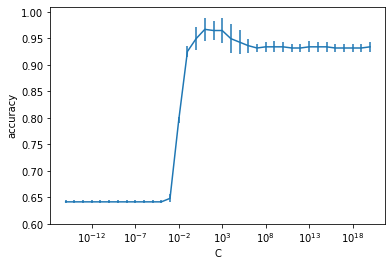

In [22]:
plt.errorbar(gs.cv_results_['param_C'].data,
            gs.cv_results_['mean_test_score'],
            yerr=gs.cv_results_['std_test_score'],
            label="test(val)")
plt.ylim(.6,1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")

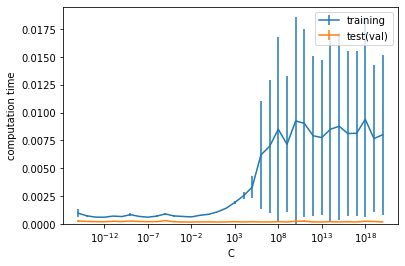

In [24]:
plt.errorbar(gs.cv_results_['param_C'].data,
            gs.cv_results_['mean_fit_time'],
            yerr=gs.cv_results_['std_fit_time'],
            label='training')
plt.errorbar(gs.cv_results_['param_C'].data,
            gs.cv_results_['mean_score_time'],
            yerr=gs.cv_results_['std_score_time'],
            label='test(val)')
plt.ylim(0, )
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time")
plt.legend(loc="best")

In [25]:
from sklearn.svm import SVC

In [26]:
clf = SVC()

C_range_exp = np.arange(-2.0, 5.0).
C_range = 10**C_range_exp

param = [
    {'C': C_range, 'kernel':['linear','rbf']},
]

gs= GridSearchCV(clf, param, n_jobs=1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ...........

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=1,
             param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [27]:
gs.best_params_,

({'C': 100.0, 'kernel': 'rbf'},)

In [ ]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data,
        gs.cv_results_['me'])